In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
project_dir = r'D:\leon\Coding Ninjas\lectures\python\covid'

In [3]:
os.getcwd()
os.chdir(project_dir)
os.getcwd()

'D:\\leon\\Coding Ninjas\\lectures\\python\\covid'

'D:\\leon\\Coding Ninjas\\lectures\\python\\covid'

In [4]:
import pandas as pd
# Load the datasets
confirmed_cases = pd.read_csv('data/covid_19_confirmed_v1.csv')
confirmed_cases.shape
deaths = pd.read_csv('data/covid_19_deaths_v1.csv')
deaths.shape
recovered_cases = pd.read_csv('data/covid_19_recovered_v1.csv')
recovered_cases.shape

(276, 498)

(277, 498)

(262, 498)

In [5]:
confirmed_cases = pd.read_excel('data/covid.xlsx', sheet_name = 'confirmed_cases')
confirmed_cases.shape
deaths = pd.read_excel('data/covid.xlsx', sheet_name = 'deaths')
deaths.shape
recovered_cases = pd.read_excel('data/covid.xlsx', sheet_name = 'recovered_cases')
recovered_cases.shape

(276, 498)

(276, 498)

(261, 498)

#### Look at the data

In [431]:
confirmed_cases.sample(n = 20)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
190,NaN,Mozambique,-18.665695,35.529562,0,0,0,0,0,0,...,70527,70551,70568,70590,70606,70636,70651,70673,70697,70724
222,NaN,Sao Tome and Principe,0.186400,6.613100,0,0,0,0,0,0,...,2334,2335,2338,2338,2338,2338,2338,2338,2344,2345
211,NaN,Poland,51.919400,19.145100,0,0,0,0,0,0,...,2861351,2863031,2864546,2865622,2866181,2867187,2868450,2869652,2870595,2871371
248,NaN,Trinidad and Tobago,10.691800,-61.222500,0,0,0,0,0,0,...,18227,18935,19444,20017,20267,20879,21461,21987,22620,23001
219,NaN,Saint Vincent and the Grenadines,12.984300,-61.287200,0,0,0,0,0,0,...,1954,1962,1973,1973,1978,1989,2006,2006,2014,2027
31,NaN,Brunei,4.535300,114.727700,0,0,0,0,0,0,...,235,235,235,235,236,236,240,241,241,241
255,Anguilla,United Kingdom,18.220600,-63.068600,0,0,0,0,0,0,...,109,109,109,109,109,109,109,109,109,109
183,NaN,Mexico,23.634500,-102.552800,0,0,0,0,0,0,...,2390140,2392744,2395330,2396604,2397307,2399790,2402722,2405772,2408778,2411503
233,NaN,South Africa,-30.559500,22.937500,0,0,0,0,0,0,...,1625003,1628335,1632571,1635465,1637848,1637848,1645555,1649977,1654551,1659070
130,NaN,France,46.227600,2.213700,0,0,2,3,3,3,...,5514022,5526555,5538938,5547914,5550143,5552977,5564217,5578150,5588981,5600353


#### Understand the level of the data

In [6]:
confirmed_cases['Country/Region'].value_counts()
confirmed_cases['Province/State'].value_counts()

# Province/State

China             34
Canada            16
France            12
United Kingdom    12
Australia          8
                  ..
Grenada            1
Guatemala          1
Guinea             1
Guinea-Bissau      1
Zimbabwe           1
Name: Country/Region, Length: 193, dtype: int64

Australian Capital Territory    1
Unknown                         1
Guadeloupe                      1
French Polynesia                1
French Guiana                   1
                               ..
Fujian                          1
Chongqing                       1
Beijing                         1
Anhui                           1
Turks and Caicos Islands        1
Name: Province/State, Length: 86, dtype: int64

In [7]:
confirmed_cases['Province/State'].isnull().sum()/confirmed_cases.shape[0]
# .sum()

0.6884057971014492

In [8]:
lolo = confirmed_cases['Province/State'].notnull()
# lolo
confirmed_cases.loc[lolo,'Country/Region'].value_counts()
# value_counts()

lolo = confirmed_cases['Province/State'].isnull()
confirmed_cases.loc[lolo,'Country/Region'].value_counts()

China             34
Canada            16
France            11
United Kingdom    11
Australia          8
Netherlands        4
Denmark            2
Name: Country/Region, dtype: int64

Afghanistan    1
Pakistan       1
Nepal          1
Netherlands    1
New Zealand    1
              ..
Greece         1
Grenada        1
Guatemala      1
Guinea         1
Zimbabwe       1
Name: Country/Region, Length: 190, dtype: int64

In [9]:
#Replace nulls in State/Provice with Country/Region create a column
confirmed_cases['final_region'] = confirmed_cases['Province/State']
confirmed_cases['final_region'] = confirmed_cases['final_region'].fillna(confirmed_cases['Country/Region'])
confirmed_cases['final_region'].value_counts()
confirmed_cases

Diamond Princess    2
Afghanistan         1
Mauritius           1
Montenegro          1
Mongolia            1
                   ..
Croatia             1
Cuba                1
Cyprus              1
Czechia             1
Zimbabwe            1
Name: final_region, Length: 275, dtype: int64

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,final_region
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,65080,65486,65728,66275,66903,67743,68366,69130,70111,Afghanistan
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,132153,132176,132209,132215,132229,132244,132264,132285,132297,Albania
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,126434,126651,126860,127107,127361,127646,127926,128198,128456,Algeria
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,13569,13569,13569,13569,13664,13671,13682,13693,13693,Andorra
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,31909,32149,32441,32623,32933,33338,33607,33944,34180,Angola
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,...,4941,5119,5275,5404,5931,6086,6356,6396,6908,Vietnam
272,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,304968,305201,305201,305777,306334,306795,306795,307569,307838,West Bank and Gaza
273,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,6632,6649,6658,6662,6670,6688,6696,6723,6731,Yemen
274,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,92920,93106,93201,93279,93428,93627,93947,94430,94751,Zambia


In [10]:
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,final_region
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,65080,65486,65728,66275,66903,67743,68366,69130,70111,Afghanistan
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132153,132176,132209,132215,132229,132244,132264,132285,132297,Albania
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,126434,126651,126860,127107,127361,127646,127926,128198,128456,Algeria
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13569,13569,13569,13569,13664,13671,13682,13693,13693,Andorra
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,31909,32149,32441,32623,32933,33338,33607,33944,34180,Angola


##### Home work - Do the same steps for the rest of two files.

In [11]:
#Understand the data types
confirmed_cases.dtypes


Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
5/26/21             int64
5/27/21             int64
5/28/21             int64
5/29/21             int64
final_region       object
Length: 499, dtype: object

In [12]:
confirmed_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Columns: 499 entries, Province/State to final_region
dtypes: float64(2), int64(494), object(3)
memory usage: 1.1+ MB


In [13]:
confirmed_cases.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
count,274.000000,274.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,...,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02
mean,20.447559,22.328281,2.018116,2.373188,3.409420,5.192029,7.673913,10.605072,20.210145,22.344203,...,5.984867e+05,6.007543e+05,6.028478e+05,6.045727e+05,6.062187e+05,6.081457e+05,6.102044e+05,6.122130e+05,6.140244e+05,6.157665e+05
std,25.189838,74.369096,26.781738,26.879567,33.464159,46.575328,65.089830,87.699030,215.201418,216.521511,...,2.797198e+06,2.808982e+06,2.819859e+06,2.828976e+06,2.837786e+06,2.847660e+06,2.857958e+06,2.867378e+06,2.875765e+06,2.883996e+06
min,-51.796300,-178.116500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.933349,-22.036550,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.316250e+03,1.316250e+03,1.316250e+03,1.316250e+03,1.316250e+03,1.316250e+03,1.328250e+03,1.335000e+03,1.346250e+03,1.351500e+03
50%,21.607878,20.921188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.869000e+04,1.888950e+04,1.897900e+04,1.899650e+04,1.901950e+04,1.904750e+04,1.907100e+04,1.909950e+04,1.913300e+04,1.916150e+04
75%,40.950592,83.380449,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.504960e+05,2.512458e+05,2.518208e+05,2.522262e+05,2.525150e+05,2.527770e+05,2.530820e+05,2.533535e+05,2.535725e+05,2.540952e+05
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,3.305676e+07,3.308511e+07,3.310488e+07,3.311774e+07,3.314366e+07,3.316642e+07,3.319047e+07,3.321800e+07,3.323996e+07,3.325194e+07


In [14]:
total_cases = confirmed_cases.groupby('Country/Region')['5/29/21'].sum()
type(total_cases)
top_countries = list(total_cases.sort_values(ascending = False)[0:3].index)
top_countries

pandas.core.series.Series

['US', 'India', 'Brazil']

In [15]:
list(total_cases.sort_values(ascending = False)[0:3].index)

['US', 'India', 'Brazil']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,final_region
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,124,124,124,124,124,124,124,124,124,Australian Capital Territory
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,5568,5570,5572,5574,5576,5576,5579,5580,5585,New South Wales
10,Northern Territory,Australia,-12.4634,130.8456,0,0,0,0,0,0,...,170,171,171,171,171,172,172,173,173,Northern Territory
11,Queensland,Australia,-27.4698,153.0251,0,0,0,0,0,0,...,1597,1597,1605,1607,1611,1613,1615,1616,1618,Queensland
12,South Australia,Australia,-34.9285,138.6007,0,0,0,0,0,0,...,748,748,748,749,750,752,752,752,752,South Australia
13,Tasmania,Australia,-42.8821,147.3272,0,0,0,0,0,0,...,234,234,234,234,234,234,234,234,234,Tasmania
14,Victoria,Australia,-37.8136,144.9631,0,0,0,0,1,1,...,20546,20547,20549,20553,20563,20575,20581,20587,20593,Victoria
15,Western Australia,Australia,-31.9505,115.8605,0,0,0,0,0,0,...,1016,1016,1016,1017,1017,1017,1017,1017,1017,Western Australia


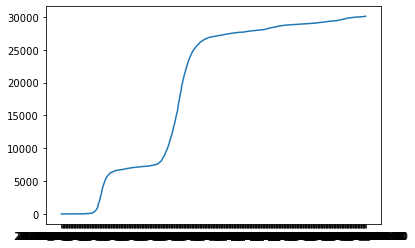

In [16]:
lolo = confirmed_cases['Country/Region'] == 'Australia'
confirmed_cases_sub = confirmed_cases[lolo]
confirmed_cases_sub
df = confirmed_cases_sub.iloc[:, 4:-1].sum(axis = 0).to_frame(name = 'col')
df.columns = ['col']
plt.plot(df.index.astype(str),df['col'])

In [17]:
lolo = confirmed_cases['Country/Region'] == 'Australia'
confirmed_cases_sub = confirmed_cases[lolo]
confirmed_cases_sub
df = confirmed_cases_sub.iloc[:, 4:-1].sum(axis = 0).to_frame(name = 'col')


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,final_region
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,124,124,124,124,124,124,124,124,124,Australian Capital Territory
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,5568,5570,5572,5574,5576,5576,5579,5580,5585,New South Wales
10,Northern Territory,Australia,-12.4634,130.8456,0,0,0,0,0,0,...,170,171,171,171,171,172,172,173,173,Northern Territory
11,Queensland,Australia,-27.4698,153.0251,0,0,0,0,0,0,...,1597,1597,1605,1607,1611,1613,1615,1616,1618,Queensland
12,South Australia,Australia,-34.9285,138.6007,0,0,0,0,0,0,...,748,748,748,749,750,752,752,752,752,South Australia
13,Tasmania,Australia,-42.8821,147.3272,0,0,0,0,0,0,...,234,234,234,234,234,234,234,234,234,Tasmania
14,Victoria,Australia,-37.8136,144.9631,0,0,0,0,1,1,...,20546,20547,20549,20553,20563,20575,20581,20587,20593,Victoria
15,Western Australia,Australia,-31.9505,115.8605,0,0,0,0,0,0,...,1016,1016,1016,1017,1017,1017,1017,1017,1017,Western Australia


In [18]:
df

,col
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,4
...,...
5/25/21,30046
5/26/21,30063
5/27/21,30074
5/28/21,30083


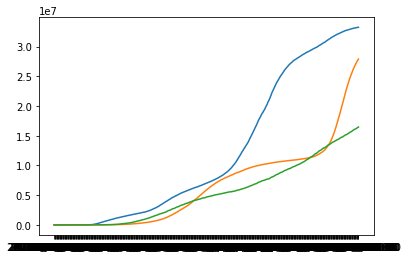

In [19]:
for country in top_countries:
    lolo = confirmed_cases['Country/Region'] == country
    confirmed_cases_sub = confirmed_cases[lolo]
    df = confirmed_cases_sub.iloc[:, 4:-1].sum(axis = 0).to_frame(name = 'col')
    plt.plot(df.index.astype(str),df['col'])

In [20]:
lolo = confirmed_cases['Country/Region'] == 'Australia'
confirmed_cases_sub = confirmed_cases[lolo]
confirmed_cases_sub.sum(axis =1)

C:\Users\HARDIKA\AppData\Local\Temp/ipykernel_22972/3293030785.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  confirmed_cases_sub.sum(axis =1)


8     4.927154e+04
9     1.847609e+06
10    2.802538e+04
11    5.236466e+05
12    2.299657e+05
13    9.642445e+04
14    6.348010e+06
15    3.257209e+05
dtype: float64

In [21]:
confirmed_cases=confirmed_cases.replace('', np.nan)
confirmed_cases.isnull().sum()
confirmed_cases[['Lat', 'Long']] = confirmed_cases[['Lat', 'Long']].fillna(0)


Province/State    190
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
5/26/21             0
5/27/21             0
5/28/21             0
5/29/21             0
final_region        0
Length: 499, dtype: int64

In [22]:
confirmed_cases.isnull().sum()

Province/State    190
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
5/26/21             0
5/27/21             0
5/28/21             0
5/29/21             0
final_region        0
Length: 499, dtype: int64

In [23]:
confirmed_cases.isnull().sum()

Province/State    190
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
5/26/21             0
5/27/21             0
5/28/21             0
5/29/21             0
final_region        0
Length: 499, dtype: int64

In [24]:
(confirmed_cases == '').sum()

Province/State    0
Country/Region    0
Lat               0
Long              0
1/22/20           0
                 ..
5/26/21           0
5/27/21           0
5/28/21           0
5/29/21           0
final_region      0
Length: 499, dtype: int64

In [25]:
dff = pd.DataFrame({'A':[1,2,3,4,5], 'B':[4,8,9,11,17]})
dff

,A,B
0,1,4
1,2,8
2,3,9
3,4,11
4,5,17


In [26]:
dff['B'].diff()

0    NaN
1    4.0
2    1.0
3    2.0
4    6.0
Name: B, dtype: float64

In [27]:
confirmed_cases.iloc[:,4]

0      0
1      0
2      0
3      0
4      0
      ..
271    0
272    0
273    0
274    0
275    0
Name: 1/22/20, Length: 276, dtype: int64

In [28]:
daily_confirmed_cases = confirmed_cases.copy()
daily_confirmed_cases.iloc[:,4:-1]= daily_confirmed_cases.iloc[:,4:-1].diff(axis = 1)
daily_confirmed_cases.iloc[:,4] = daily_confirmed_cases.iloc[:,4].fillna(confirmed_cases.iloc[:,4])
daily_confirmed_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,final_region
0,NaN,Afghanistan,33.939110,67.709953,0.0,0,0,0,0,0,...,505,406,242,547,628,840,623,764,981,Afghanistan
1,NaN,Albania,41.153300,20.168300,0.0,0,0,0,0,0,...,35,23,33,6,14,15,20,21,12,Albania
2,NaN,Algeria,28.033900,1.659600,0.0,0,0,0,0,0,...,278,217,209,247,254,285,280,272,258,Algeria
3,NaN,Andorra,42.506300,1.521800,0.0,0,0,0,0,0,...,0,0,0,0,95,7,11,11,0,Andorra
4,NaN,Angola,-11.202700,17.873900,0.0,0,0,0,0,0,...,248,240,292,182,310,405,269,337,236,Angola
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,NaN,Vietnam,14.058324,108.277199,0.0,2,0,0,0,0,...,132,178,156,129,527,155,270,40,512,Vietnam
272,NaN,West Bank and Gaza,31.952200,35.233200,0.0,0,0,0,0,0,...,436,233,0,576,557,461,0,774,269,West Bank and Gaza
273,NaN,Yemen,15.552727,48.516388,0.0,0,0,0,0,0,...,19,17,9,4,8,18,8,27,8,Yemen
274,NaN,Zambia,-13.133897,27.849332,0.0,0,0,0,0,0,...,166,186,95,78,149,199,320,483,321,Zambia


In [29]:
deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,2772,2782,2792,2802,2812,2836,2855,2869,2881,2899
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,2440,2441,2442,2444,2445,2447,2447,2447,2448,2449
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,3401,3405,3411,3418,3426,3433,3440,3448,3455,3460
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,704,709,715,725,731,735,742,745,749,757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,...,39,41,42,43,44,44,45,46,47,47
272,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,3448,3452,3459,3459,3470,3480,3483,3483,3489,3492
273,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1301,1302,1304,1307,1310,1311,1313,1315,1316,1319
274,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,1265,1266,1267,1268,1271,1271,1273,1275,1275,1276


In [30]:
# 22nd January 2020 - 1500
# 23rd January 2020 - 2300
# 24th Janruary 2020 - 3200

In [31]:
# 23rd January - 2300 - 1500
# 24th January 3200- 2300

In [32]:
confirmed_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,final_region
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,65080,65486,65728,66275,66903,67743,68366,69130,70111,Afghanistan
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,132153,132176,132209,132215,132229,132244,132264,132285,132297,Albania
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,126434,126651,126860,127107,127361,127646,127926,128198,128456,Algeria
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,13569,13569,13569,13569,13664,13671,13682,13693,13693,Andorra
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,31909,32149,32441,32623,32933,33338,33607,33944,34180,Angola
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,...,4941,5119,5275,5404,5931,6086,6356,6396,6908,Vietnam
272,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,304968,305201,305201,305777,306334,306795,306795,307569,307838,West Bank and Gaza
273,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,6632,6649,6658,6662,6670,6688,6696,6723,6731,Yemen
274,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,92920,93106,93201,93279,93428,93627,93947,94430,94751,Zambia


In [33]:
countries = ['Germany', 'France', 'Italy']


In [34]:
#Imagine the edge cases
# 1. Country not present
# 2. Country has multiple provinces

In [35]:
daily_cases = pd.DataFrame()
subset = confirmed_cases[confirmed_cases['Country/Region'] == 'Australia']
subset = pd.DataFrame(subset.iloc[:,4:-1].sum().diff()).T
subset['Country/Region'] = 'Australia'
daily_cases = daily_cases.append(subset)
daily_cases

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,Country/Region
0,NaN,0.0,0.0,0.0,4.0,1.0,0.0,1.0,3.0,0.0,...,4.0,4.0,12.0,10.0,17.0,17.0,11.0,9.0,13.0,Australia


In [50]:
subset = deaths[deaths['Country/Region'] == 'Germany']
subset = pd.DataFrame(subset.iloc[:,4:-1].sum().diff()).T
subset['Country/Region'] = 'Germany'
subsub = subset.iloc[0:-1].T
# subsub[subsub<0]
(subsub<0).sum()
# subset.iloc[]

Series([], dtype: float64)

In [84]:
subset = confirmed_cases[confirmed_cases['Country/Region'] == 'France']
subset = pd.DataFrame(subset.iloc[:,4:-1].sum().diff()).T
subset['Country/Region'] = 'France'
# (subset.iloc[0:,0:-1]<0).sum().sum()
subsub = subset.iloc[0:, 0:-1].T
subsub.columns = ['Cases']
confirmed_cases.loc[confirmed_cases['Country/Region'] == 'France', ['4/22/20', '4/23/20', '4/24/20']]
# subsub[subsub['Cases']<0]
# subset.iloc[]

,4/22/20,4/23/20,4/24/20
119,97,107,111
120,57,57,57
121,148,148,149
122,164,164,170
123,326,326,354
124,18,18,18
125,410,412,412
126,6,6,6
127,1,1,1
128,38,38,38


In [51]:
subset = confirmed_cases[confirmed_cases['Country/Region'] == 'Germany']
subset = pd.DataFrame(subset.iloc[:,4:-1].sum().diff()).T
subset['Country/Region'] = 'Germany'
# subset
daily_cases = daily_cases.append(subset)
daily_cases


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,Country/Region
0,NaN,0.0,0.0,0.0,4.0,1.0,0.0,1.0,3.0,0.0,...,4.0,4.0,12.0,10.0,17.0,17.0,11.0,9.0,13.0,Australia
0,NaN,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,1.0,...,8096.0,6419.0,4643.0,2328.0,2578.0,4473.0,6949.0,6169.0,4513.0,Germany
0,NaN,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,1.0,...,8096.0,6419.0,4643.0,2328.0,2578.0,4473.0,6949.0,6169.0,4513.0,Germany


In [62]:
subset = confirmed_cases[confirmed_cases['Country/Region'] == 'France']
subset = pd.DataFrame(subset.iloc[:,4:-1].sum().diff()).T
subset['Country/Region'] = 'France'
(subset.iloc[:,0:-1]<0).sum().sum()

10

In [52]:
daily_cases = pd.DataFrame()
for country in ['Germany', 'France', 'Italy']:
    subset = confirmed_cases[confirmed_cases['Country/Region'] == country]
    subset = pd.DataFrame(subset.iloc[:,4:-1].sum().diff()).T
    subset['Country/Region'] = country
    daily_cases = daily_cases.append(subset)
daily_cases

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,Country/Region
0,NaN,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,1.0,...,8096.0,6419.0,4643.0,2328.0,2578.0,4473.0,6949.0,6169.0,4513.0,Germany
0,NaN,0.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,12803.0,12611.0,9704.0,2230.0,3155.0,12657.0,13933.0,11274.0,11527.0,France
0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,5215.0,4714.0,3993.0,2489.0,3220.0,3935.0,4143.0,3737.0,3348.0,Italy


In [60]:
(daily_cases.iloc[0:,0:-1]<0).sum().sum()

11

In [464]:
daily_cases = pd.DataFrame()
subset = confirmed_cases[confirmed_cases['Country/Region'] == 'Australia']
subset = pd.DataFrame(subset.iloc[:,4:-1].sum().diff()).T
subset['Country/Region'] = 'Australia'
daily_cases = daily_cases.append(subset)

In [465]:
subset = confirmed_cases[confirmed_cases['Country/Region'] == 'Germany']
subset = pd.DataFrame(subset.iloc[:,4:-1].sum().diff()).T
subset['Country/Region'] = 'Germany'
daily_cases = daily_cases.append(subset)

In [466]:
daily_cases

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,Country/Region
0,NaN,0.0,0.0,0.0,4.0,1.0,0.0,1.0,3.0,0.0,...,4.0,4.0,12.0,10.0,17.0,17.0,11.0,9.0,13.0,Australia
0,NaN,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,1.0,...,8096.0,6419.0,4643.0,2328.0,2578.0,4473.0,6949.0,6169.0,4513.0,Germany


In [467]:
daily_cases = pd.DataFrame()
subset = confirmed_cases[confirmed_cases['Country/Region'] == 'Australia']
subset = pd.DataFrame(subset.iloc[:,4:-1].diff(axis = 1).sum()).T
subset['Country/Region'] = 'Australia'
daily_cases = daily_cases.append(subset)

In [468]:
daily_cases

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,Country/Region
0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,1.0,3.0,0.0,...,4.0,4.0,12.0,10.0,17.0,17.0,11.0,9.0,13.0,Australia


In [469]:
subset = confirmed_cases[confirmed_cases['Country/Region'] == 'Australia']
subset.iloc[:,4:-1].diff(axis = 1).sum()

1/22/20     0.0
1/23/20     0.0
1/24/20     0.0
1/25/20     0.0
1/26/20     4.0
           ... 
5/25/21    17.0
5/26/21    17.0
5/27/21    11.0
5/28/21     9.0
5/29/21    13.0
Length: 494, dtype: float64

In [470]:
daily_cases = pd.DataFrame()
for country in ['Germany', 'Italy', 'France']:
    subset = confirmed_cases[confirmed_cases['Country/Region'] == country]
    subset = pd.DataFrame(subset.iloc[:,4:-1].diff(axis = 1).sum()).T
    subset['Country/Region'] = country
    daily_cases = daily_cases.append(subset)

In [471]:
daily_cases = daily_cases.reset_index(drop = True)

In [472]:
subset = confirmed_cases[confirmed_cases['Country/Region'] == 'Australia']
subset = pd.DataFrame(subset.iloc[:,4:-1].diff(axis = 1).sum(axis = 0)).T
subset['Country/Region'] = 'Australia'
subset

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,Country/Region
0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,1.0,3.0,0.0,...,4.0,4.0,12.0,10.0,17.0,17.0,11.0,9.0,13.0,Australia


In [473]:
daily_cases

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,Country/Region
0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,1.0,...,8096.0,6419.0,4643.0,2328.0,2578.0,4473.0,6949.0,6169.0,4513.0,Germany
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,5215.0,4714.0,3993.0,2489.0,3220.0,3935.0,4143.0,3737.0,3348.0,Italy
2,0.0,0.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,12803.0,12611.0,9704.0,2230.0,3155.0,12657.0,13933.0,11274.0,11527.0,France


In [474]:
daily_cases['Country/Region'].tolist()

['Germany', 'Italy', 'France']

In [475]:
lst = [1,2,3,4,5]
lst.idxmax()

AttributeError: 'list' object has no attribute 'idxmax'

In [ ]:
student_name = ['Shubham', 'Arti', 'Tulasi', 'Aashi', 'Abhishek']
marks = [11,21,34,14,5]
maxm = -99999
idx = 0
for index, value in enumerate(marks):
    if(value>maxm):
        maxm = value
        idx = index

In [ ]:
student_name[idx]

In [ ]:
maxm
idx

In [ ]:
lst = [1,2,3,4,5]
Series = pd.Series(lst)
Series.idxmax()

In [ ]:
arr = np.array([1,2,3,4,5])
arr.argmax()

In [ ]:
s = pd.Series([1,2,3,4,5])
s.argmax()

In [ ]:
pd.Series([1,2,3,4,5]).idxmax()

In [ ]:

data = daily_cases.loc[daily_cases['Country/Region'] == 'Germany']
data = data.iloc[0,0:-1]
data
idx = data.values.argmax()
idx
data.index[idx]
data = data.astype(int)

In [ ]:
data.values[343]

In [ ]:
data.idxmax()

In [ ]:
data.idxmax()

In [ ]:
student = np.array(['A', 'B', 'C'])
marks = np.array([34, 56, 40])
marks.argmax()
student[marks.argmax()]
marks.max()

In [ ]:
data.values.argmax()

In [ ]:
peak = {}
for country in daily_cases['Country/Region'].tolist():
    data = daily_cases.loc[daily_cases['Country/Region'] == country]
    data = data.iloc[0,0:-1]
    # data
    peak[country] = (data.index[data.values.argmax()], data.values.max())


In [ ]:
daily_cases

In [ ]:
countries = daily_cases['Country/Region'].tolist()
countries

In [ ]:
df = daily_cases.iloc[:,0:-1].T
df.columns = countries
# df.plot()

In [ ]:
for country in countries:
    plt.plot(df[country].index.astype(str), df[country])

In [ ]:
df[df<0] = 0

In [ ]:
plt.plot(df['Germany'].index.astype(str), df['Germany'])
plt.plot(df['Italy'].index.astype(str), df['Italy'])
plt.plot(df['France'].index.astype(str), df['France'])

In [ ]:
data.index[343]

In [476]:
df = pd.DataFrame({'A':[1,2,3,4]})

In [477]:
df.index = ['t', 'p', 'q', 'r']
df

,A
t,1
p,2
q,3
r,4


In [478]:
confirmed_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,final_region
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,65080,65486,65728,66275,66903,67743,68366,69130,70111,Afghanistan
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,132153,132176,132209,132215,132229,132244,132264,132285,132297,Albania
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,126434,126651,126860,127107,127361,127646,127926,128198,128456,Algeria
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,13569,13569,13569,13569,13664,13671,13682,13693,13693,Andorra
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,31909,32149,32441,32623,32933,33338,33607,33944,34180,Angola
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,...,4941,5119,5275,5404,5931,6086,6356,6396,6908,Vietnam
272,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,304968,305201,305201,305777,306334,306795,306795,307569,307838,West Bank and Gaza
273,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,6632,6649,6658,6662,6670,6688,6696,6723,6731,Yemen
274,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,92920,93106,93201,93279,93428,93627,93947,94430,94751,Zambia


In [479]:
deaths_canada = deaths.loc[deaths['Country/Region'] == 'Canada', ['Province/State', '5/29/21']]
deaths_canada.index = deaths_canada['Province/State'].tolist()
confirmed_canada = confirmed_cases.loc[confirmed_cases['Country/Region'] == 'Canada', ['Province/State', '5/29/21']]
confirmed_canada.index = confirmed_canada['Province/State'].tolist()


In [480]:
# deaths = pd.DataFrame({'Cases':[1,2,3,4,5], 'Province':['Province1', 'Province2', 'Province3', 'Province4', 'Province5']})
# confirmed = pd.DataFrame({'Cases':[10,20,40,30,20], 'Province': ['Province2', 'Province1', 'Province4', 'Province3', 'Province5']})
# deaths
# confirmed

In [481]:
deaths.index = deaths['Province']
confirmed.index = confirmed['Province']
deaths['Cases']/confirmed['Cases']

KeyError: 'Province'

In [482]:
deaths_canada['death_rate'] = deaths_canada['5/29/21']/confirmed_canada['5/29/21']
# confirmed_canada
deaths_canada.reset_index(drop = True)

,Province/State,5/29/21,death_rate
0,Alberta,2214,0.009760
1,British Columbia,1692,0.011784
2,Diamond Princess,1,inf
3,Grand Princess,0,0.000000
4,Manitoba,1045,0.020693
5,New Brunswick,43,0.019626
6,Newfoundland and Labrador,6,0.004608
7,Northwest Territories,0,0.000000
8,Nova Scotia,84,0.015190
9,Nunavut,4,0.006173


In [483]:
(confirmed_cases['Country/Region'] == 'Canada')

0      False
1      False
2      False
3      False
4      False
       ...  
271    False
272    False
273    False
274    False
275    False
Name: Country/Region, Length: 276, dtype: bool

In [484]:
df['A'].idxmax()

'r'

In [485]:
ind = df['A'].index
values = df['A'].values

In [486]:
ind
values

Index(['t', 'p', 'q', 'r'], dtype='object')

array([1, 2, 3, 4], dtype=int64)

In [487]:
i = values.argmax()

In [488]:
ind[3]

'r'

In [489]:
confirmed_cases_long = confirmed_cases.melt(id_vars = ['Province/State', 'Country/Region', 'Lat', 'Long', 'final_region'], var_name = 'Date', value_name = 'confirmed_cases')

In [490]:
confirmed_cases_long[confirmed_cases_long['Country/Region'] == 'Afghanistan']

,Province/State,Country/Region,Lat,Long,final_region,Date,confirmed_cases
0,NaN,Afghanistan,33.93911,67.709953,Afghanistan,1/22/20,0
276,NaN,Afghanistan,33.93911,67.709953,Afghanistan,1/23/20,0
552,NaN,Afghanistan,33.93911,67.709953,Afghanistan,1/24/20,0
828,NaN,Afghanistan,33.93911,67.709953,Afghanistan,1/25/20,0
1104,NaN,Afghanistan,33.93911,67.709953,Afghanistan,1/26/20,0
...,...,...,...,...,...,...,...
134964,NaN,Afghanistan,33.93911,67.709953,Afghanistan,5/25/21,66903
135240,NaN,Afghanistan,33.93911,67.709953,Afghanistan,5/26/21,67743
135516,NaN,Afghanistan,33.93911,67.709953,Afghanistan,5/27/21,68366
135792,NaN,Afghanistan,33.93911,67.709953,Afghanistan,5/28/21,69130


In [492]:
deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,2772,2782,2792,2802,2812,2836,2855,2869,2881,2899
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,2440,2441,2442,2444,2445,2447,2447,2447,2448,2449
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,3401,3405,3411,3418,3426,3433,3440,3448,3455,3460
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,704,709,715,725,731,735,742,745,749,757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,...,39,41,42,43,44,44,45,46,47,47
272,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,3448,3452,3459,3459,3470,3480,3483,3483,3489,3492
273,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1301,1302,1304,1307,1310,1311,1313,1315,1316,1319
274,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,1265,1266,1267,1268,1271,1271,1273,1275,1275,1276


In [493]:
deaths_long = deaths.melt(id_vars=["Province/State", "Country/Region", "Lat", "Long"], var_name="Date", value_name="Deaths")
deaths_long['Date'] = pd.to_datetime(deaths_long['Date'])

In [494]:
deaths_long

,Province/State,Country/Region,Lat,Long,Date,Deaths
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0.0
1,NaN,Albania,41.153300,20.168300,2020-01-22,0.0
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0.0
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0.0
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0.0
...,...,...,...,...,...,...
136339,NaN,Vietnam,14.058324,108.277199,2021-05-29,47.0
136340,NaN,West Bank and Gaza,31.952200,35.233200,2021-05-29,3492.0
136341,NaN,Yemen,15.552727,48.516388,2021-05-29,1319.0
136342,NaN,Zambia,-13.133897,27.849332,2021-05-29,1276.0


In [509]:
confirmed_long = confirmed_cases.melt(id_vars = ["Province/State", "Country/Region", "Lat", "Long", 'final_region'], var_name = 'Date', value_name = 'Confirmed')
confirmed_long['Date'] = pd.to_datetime(confirmed_long['Date'])

In [505]:
deaths_long[['Province/State', 'Country/Region', 'Date', 'Deaths']]
confirmed_long

,Province/State,Country/Region,Date,Deaths
0,NaN,Afghanistan,2020-01-22,0.0
1,NaN,Albania,2020-01-22,0.0
2,NaN,Algeria,2020-01-22,0.0
3,NaN,Andorra,2020-01-22,0.0
4,NaN,Angola,2020-01-22,0.0
...,...,...,...,...
136339,NaN,Vietnam,2021-05-29,47.0
136340,NaN,West Bank and Gaza,2021-05-29,3492.0
136341,NaN,Yemen,2021-05-29,1319.0
136342,NaN,Zambia,2021-05-29,1276.0


,Province/State,Country/Region,Lat,Long,final_region,Date,Confirmed
0,NaN,Afghanistan,33.939110,67.709953,Afghanistan,1/22/20,0
1,NaN,Albania,41.153300,20.168300,Albania,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,Algeria,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,Andorra,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,Angola,1/22/20,0
...,...,...,...,...,...,...,...
136339,NaN,Vietnam,14.058324,108.277199,Vietnam,5/29/21,6908
136340,NaN,West Bank and Gaza,31.952200,35.233200,West Bank and Gaza,5/29/21,307838
136341,NaN,Yemen,15.552727,48.516388,Yemen,5/29/21,6731
136342,NaN,Zambia,-13.133897,27.849332,Zambia,5/29/21,94751


In [511]:
df_final = confirmed_long.merge(deaths_long[['Province/State', 'Country/Region', 'Date', 'Deaths']], on = ['Province/State', 'Country/Region', 'Date'])

In [512]:
df_final

,Province/State,Country/Region,Lat,Long,final_region,Date,Confirmed,Deaths
0,NaN,Afghanistan,33.939110,67.709953,Afghanistan,2020-01-22,0,0.0
1,NaN,Albania,41.153300,20.168300,Albania,2020-01-22,0,0.0
2,NaN,Algeria,28.033900,1.659600,Algeria,2020-01-22,0,0.0
3,NaN,Andorra,42.506300,1.521800,Andorra,2020-01-22,0,0.0
4,NaN,Angola,-11.202700,17.873900,Angola,2020-01-22,0,0.0
...,...,...,...,...,...,...,...,...
136339,NaN,Vietnam,14.058324,108.277199,Vietnam,2021-05-29,6908,47.0
136340,NaN,West Bank and Gaza,31.952200,35.233200,West Bank and Gaza,2021-05-29,307838,3492.0
136341,NaN,Yemen,15.552727,48.516388,Yemen,2021-05-29,6731,1319.0
136342,NaN,Zambia,-13.133897,27.849332,Zambia,2021-05-29,94751,1276.0


In [ ]:
# Afghanistan 5000   50000  10%
# Albania     4000   80000  5%

In [520]:
dff = pd.DataFrame(df_final.loc[df_final['Country/Region'] == 'Afghanistan', ['Deaths', 'Confirmed']].sum()).T

In [531]:
group = df_final.groupby(['Country/Region'])
group

In [538]:
# dir(group)
group['Deaths'].sum()
type(df_final['Deaths'])
df_final['Deaths'].sum()

Country/Region
Afghanistan           669075.0
Albania               375955.0
Algeria               834080.0
Andorra                32100.0
Angola                116489.0
                        ...   
Vietnam                10220.0
West Bank and Gaza    440368.0
Yemen                 237613.0
Zambia                205990.0
Zimbabwe              237234.0
Name: Deaths, Length: 193, dtype: float64

pandas.core.series.Series

624090533.0

In [546]:
df_group = group[['Deaths', 'Confirmed']].sum()
df_group['death_rate'] = df_group['Deaths']/df_group['Confirmed']

In [547]:
df_group

,Deaths,Confirmed,death_rate
Country/Region,,,
Afghanistan,669075.0,17026442,0.039296
Albania,375955.0,19768869,0.019018
Algeria,834080.0,27684358,0.030128
Andorra,32100.0,2379802,0.013489
Angola,116489.0,4764863,0.024448
...,...,...,...
Vietnam,10220.0,615984,0.016591
West Bank and Gaza,440368.0,41818939,0.010530
Yemen,237613.0,962066,0.246982


In [564]:
def series_sum(x):
    s = 0
    for i in x:
        s +=i
    return s
        

In [565]:
series_sum([1,2,3,4])

10

In [569]:
# For each country find total number of deaths and average daily confirmed cases
temp_df = df_final.groupby(['Country/Region']).agg(total_deaths = ('Deaths', 'sum'), avg_daily_cases = ('Confirmed', 'mean'))


In [570]:
temp_df

,total_deaths,avg_daily_cases
Country/Region,,
Afghanistan,669075.0,34466.481781
Albania,375955.0,40017.953441
Algeria,834080.0,56041.210526
Andorra,32100.0,4817.412955
Angola,116489.0,9645.471660
...,...,...
Vietnam,10220.0,1246.931174
West Bank and Gaza,440368.0,84653.722672
Yemen,237613.0,1947.502024


<Figure size 800x640 with 0 Axes>

<AxesSubplot:xlabel='Country/Region'>

Text(0.5, 1.0, 'Avg Daily Cases country wise')

Text(0.5, 0, 'Country/Region')

Text(0, 0.5, 'Avg daily cases')

(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225.]),
 [Text(-25.0, 0, 'Switzerland'),
  Text(0.0, 0, 'Afghanistan'),
  Text(25.0, 0, 'Bulgaria'),
  Text(50.0, 0, 'Dominica'),
  Text(75.0, 0, 'Holy See'),
  Text(100.0, 0, 'Liberia'),
  Text(125.0, 0, 'Netherlands'),
  Text(150.0, 0, 'Sao Tome and Principe'),
  Text(175.0, 0, 'Togo'),
  Text(200.0, 0, ''),
  Text(225.0, 0, '')])

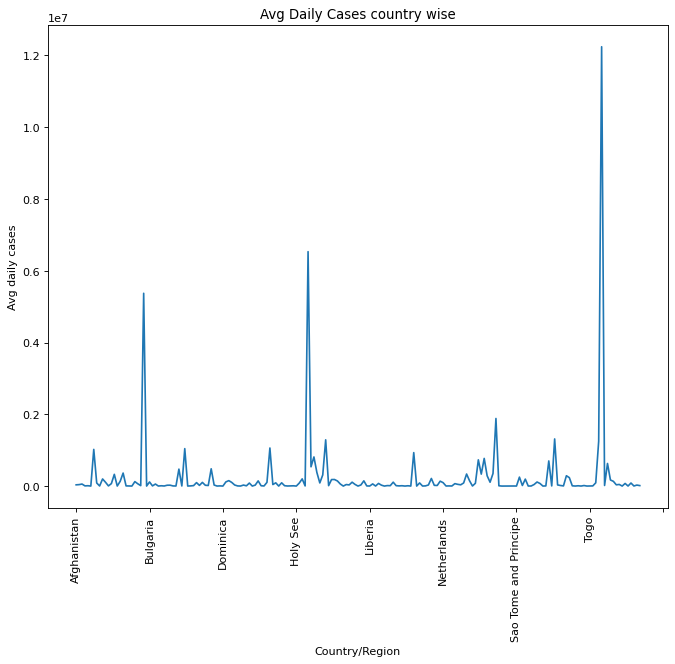

In [563]:
plt.figure(figsize=(10, 8), dpi=80)
temp_df['avg_daily_cases'].plot()
plt.title('Avg Daily Cases country wise')
plt.xlabel('Country/Region')
plt.ylabel('Avg daily cases')
plt.xticks(rotation = 90)

plt.show()

In [574]:
recovered_long = recovered_cases.melt(id_vars=["Province/State", "Country/Region", "Lat", "Long"], var_name="Date", value_name="Recovered")
recovered_long['Date'] = pd.to_datetime(recovered_long['Date'])
df_final = df_final.merge(recovered_long[['Province/State', 'Country/Region', 'Date', 'Recovered']], on = ['Province/State', 'Country/Region', 'Date']) 

In [575]:
df_final

,Province/State,Country/Region,Lat,Long,final_region,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.939110,67.709953,Afghanistan,2020-01-22,0,0.0,0.0
1,NaN,Albania,41.153300,20.168300,Albania,2020-01-22,0,0.0,0.0
2,NaN,Algeria,28.033900,1.659600,Algeria,2020-01-22,0,0.0,0.0
3,NaN,Andorra,42.506300,1.521800,Andorra,2020-01-22,0,0.0,0.0
4,NaN,Angola,-11.202700,17.873900,Angola,2020-01-22,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
128435,NaN,Vietnam,14.058324,108.277199,Vietnam,2021-05-29,6908,47.0,2896.0
128436,NaN,West Bank and Gaza,31.952200,35.233200,West Bank and Gaza,2021-05-29,307838,3492.0,300524.0
128437,NaN,Yemen,15.552727,48.516388,Yemen,2021-05-29,6731,1319.0,3399.0
128438,NaN,Zambia,-13.133897,27.849332,Zambia,2021-05-29,94751,1276.0,91594.0


C:\Users\HARDIKA\AppData\Local\Temp/ipykernel_34796/2290416447.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us['yyyy-mm'] = df_us['Date'].dt.to_period('M')


<Figure size 720x576 with 0 Axes>

<AxesSubplot:xlabel='yyyy-mm'>

(array([600, 612]), [Text(0, 0, ''), Text(0, 0, '')])

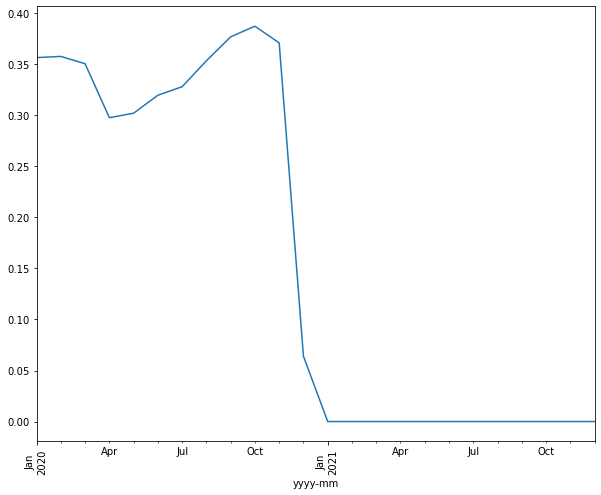

In [593]:
df_us = df_final[df_final['Country/Region'] == 'US']
df_us['yyyy-mm'] = df_us['Date'].dt.to_period('M')
df_us = df_us.groupby('yyyy-mm')[['Recovered', 'Confirmed']].sum()
df_us['recovery_rate'] = df_us['Recovered']/df_us['Confirmed']
plt.figure(figsize = (10,8))
df_us['recovery_rate'].plot()
plt.xticks(rotation = 90)

In [615]:
df = pd.DataFrame({'State':['Andhra', 'Andhra', 'Tamil Nadu','Tamil Nadu', 'UP', 'UP', 'UP'], 
                   'Cities':['Anantpur', 'Amravati', 'Chennai','Trivandrum', 'Lucknow', 'Agra', 'Kanpur'],
                   'Population':[1000,2000, 500,6000,7000,1000,500]})
df.groupby(['State', 'Cities'])['Population'].max().idxmax()

('UP', 'Lucknow')

In [607]:
import statistics
def new_mode(x):
    return statistics.mode(list(x))

In [608]:
df.groupby('State').agg(common_transaction = ('Cities', new_mode))

,common_transaction
State,
Andhra,T1
Tamil Nadu,T2
UP,T1


In [ ]:
T1
df['transaction_type'] == 'T1'

In [616]:
pd.to_datetime(4498)

Timestamp('1970-01-01 00:00:00.000004498')

In [617]:
pd.to_datetime(43892)

Timestamp('1970-01-01 00:00:00.000043892')

In [619]:
from datetime import datetime, timedelta
base_date = datetime(1899, 12, 30)

# Define the Excel serial number
excel_serial_number = 43892

# Convert the serial number to a date
converted_date = base_date + timedelta(days=excel_serial_number)

# Print the converted date
print(converted_date)

2020-03-02 00:00:00


In [620]:
base_date = pd.Timestamp('1899-12-30')

In [622]:
base_date + pd.to_datetime(43892, unit = 'D')

TypeError: unsupported operand type(s) for +: 'Timestamp' and 'Timestamp'

In [623]:
import pandas as pd
from datetime import timedelta


base_date = pd.Timestamp('1899-12-30')
excel_serial_number = 43892
converted_date = base_date + pd.to_timedelta(excel_serial_number, unit='D')
print(converted_date)


2020-03-02 00:00:00
